In [1]:
versioninfo()

Julia Version 1.9.1
Commit 147bdf428cd (2023-06-07 08:27 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × AMD Ryzen 7 PRO 4750U with Radeon Graphics
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, znver2)
  Threads: 2 on 16 virtual cores
Environment:
  JULIA_PKG_SERVER = https://mirrors.tuna.tsinghua.edu.cn/julia


# 1 The product function can produce incorrect results for 8-bit, 16-bit, and 32-bit integers
- SOLVED.

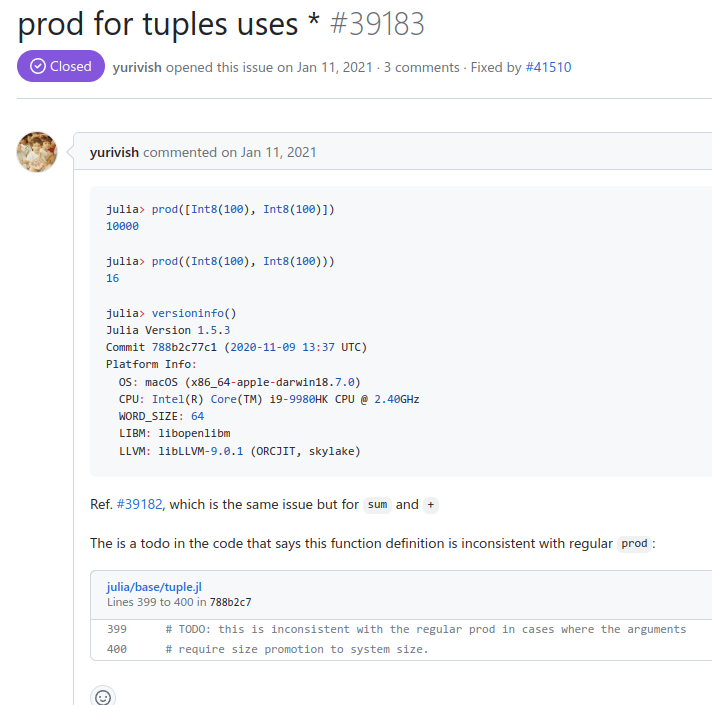

- https://github.com/JuliaLang/julia/issues/39183


In [2]:
display(prod([Int8(100), Int8(100)]))
display(prod((Int8(100), Int8(100))))

10000

10000

# 2 Incorrect pdf for Dirichlet distribution #1241

- Solved.

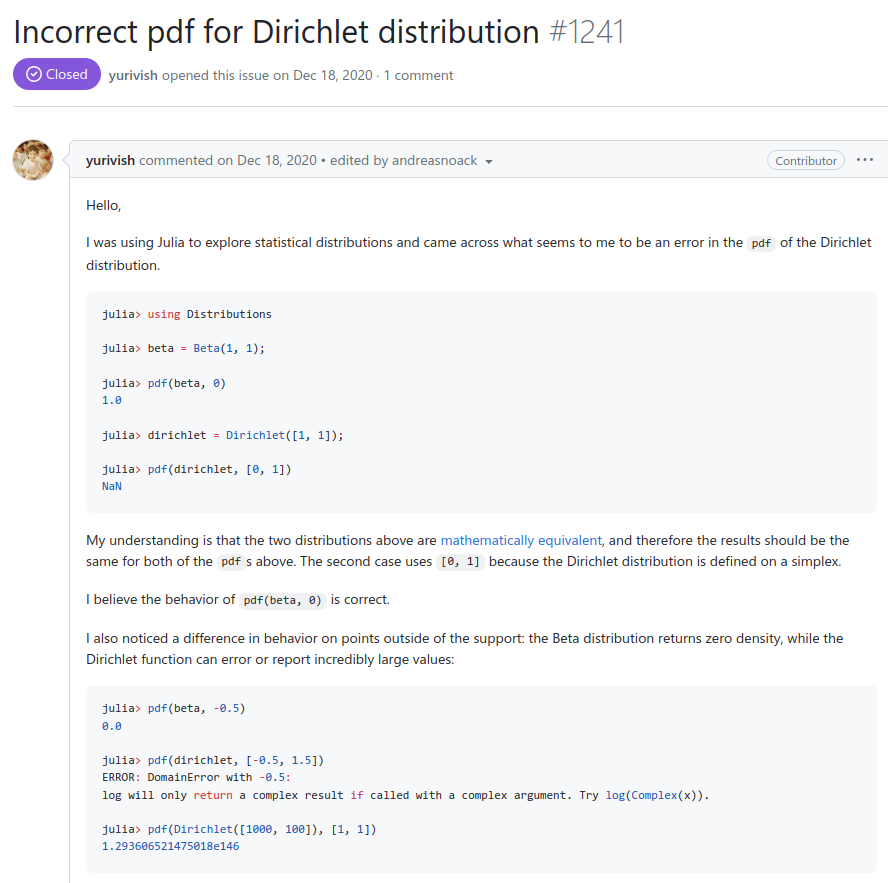

- https://github.com/JuliaStats/Distributions.jl/issues/1241
- https://stats.stackexchange.com/questions/78618/what-is-the-dirichlet-equivalent-of-a-beta-1-1-distribution

My understanding is that the two distributions above are mathematically equivalent, and therefore the results should be the same for both of the pdfs above. The second case uses [0, 1] because the Dirichlet distribution is defined on a simplex.

I believe the behavior of pdf(beta, 0) is correct.

In [1]:
using Distributions;
beta = Beta(1, 1);

display(pdf(beta, 0));
dirichlet = Dirichlet([1, 1]);

display(pdf(dirichlet, [0, 1]));

1.0

1.0

I also noticed a difference in behavior on points outside of the support: the Beta distribution returns zero density, while the Dirichlet function can error or report incredibly large values:

In [5]:
display(pdf(beta, -0.5));

display(pdf(dirichlet, [-0.5, 1.5]));

display(pdf(Dirichlet([1000, 100]), [1, 1]));

0.0

0.0

0.0

In [8]:
using StatsBase;
let counts = zeros(5)
   for _ in 1:10^5
       let a = [1, 2, 3, 4, 5]
           for samp in StatsBase.fisher_yates_sample!(a, a)
               counts[samp] += 1
           end
       end
   end
   counts
end

LoadError: ArgumentError: output array x must not share memory with input array a

# 3 Incorrect Histogram fit for arrays of equal Float64 values

- Solved.
- https://github.com/JuliaStats/StatsBase.jl/issues/616

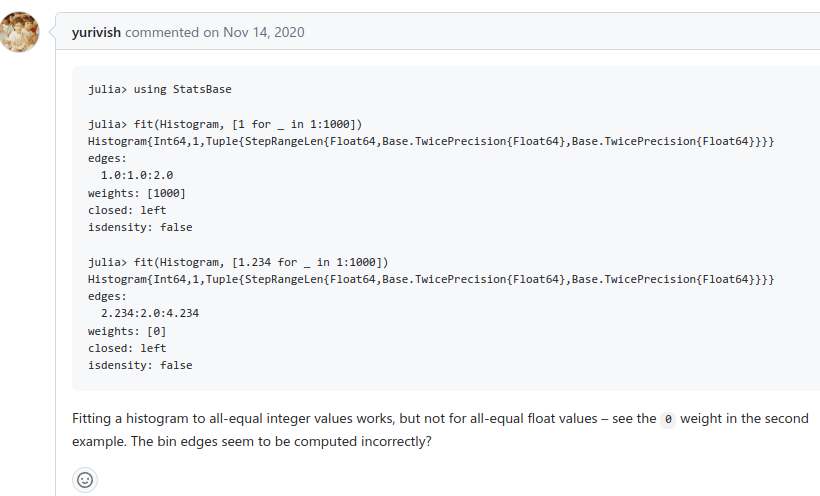

In [3]:
using StatsBase

In [4]:
fit(Histogram, [1 for _ in 1:1000])

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.0:1.0:2.0
weights: [1000]
closed: left
isdensity: false

In [5]:
fit(Histogram, [1.234 for _ in 1:1000])

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  1.234:1.0:2.234
weights: [1000]
closed: left
isdensity: false

In [9]:
fit(Histogram, rand(100))

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  0.0:0.2:1.0
weights: [29, 18, 11, 21, 21]
closed: left
isdensity: false

# 4 sum!, prod!, any!, and all! may silently return incorrect results #39385

- https://github.com/JuliaLang/julia/issues/39385

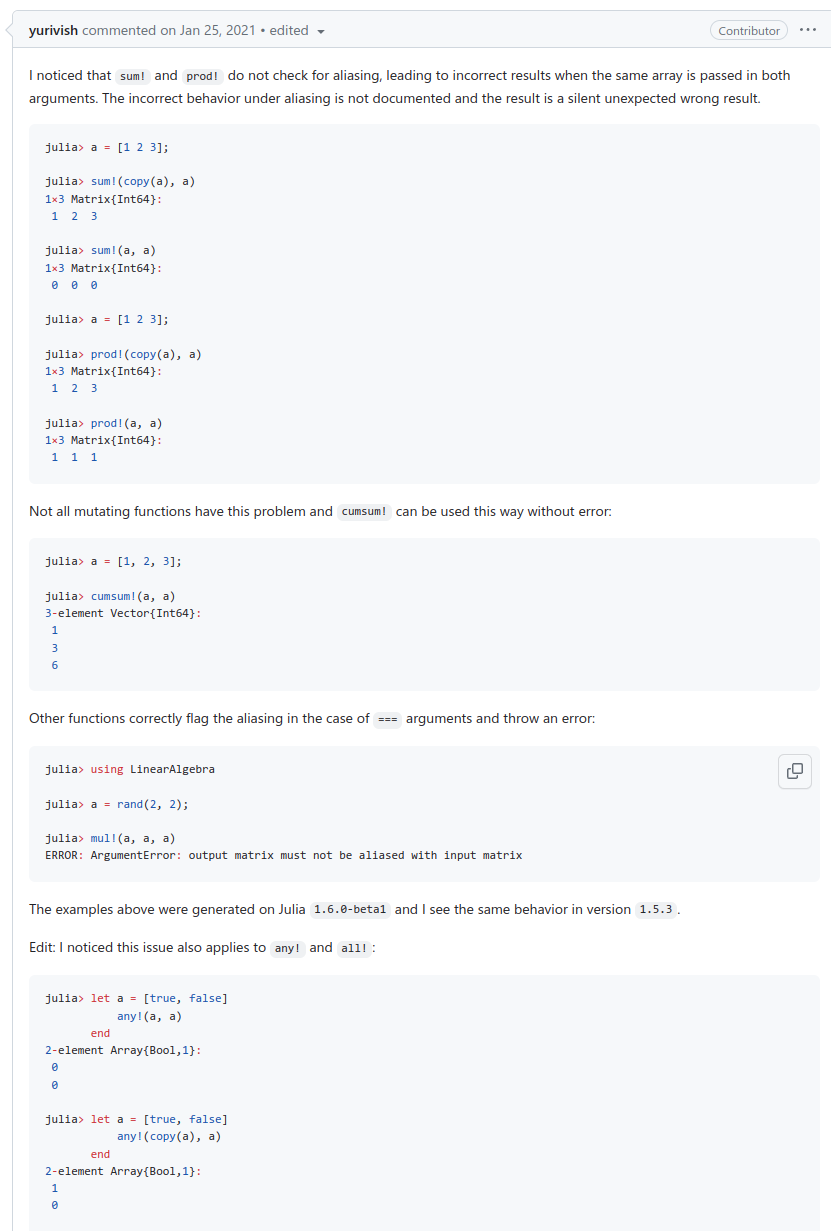

In [17]:
a = [1 2 3];
display(sum!(copy(a), a))
print("a=", a)

display(sum!(a, a))
print("a=", a)
a = [1 2 3];
display(prod!(copy(a), a))
print("a=", a)

display(prod!(a, a))
print("a=", a)


1×3 Matrix{Int64}:
 1  2  3

a=[1 2 3]

1×3 Matrix{Int64}:
 0  0  0

a=[0 0 0]

1×3 Matrix{Int64}:
 1  2  3

a=[1 2 3]

1×3 Matrix{Int64}:
 1  1  1

a=[1 1 1]

In [19]:
a = [1, 2, 3];
display(cumsum!(a, a))
print("a=",a)


3-element Vector{Int64}:
 1
 3
 6

a=[1, 3, 6]

# 5 OrderedDict corrupted keys #71

solved

- https://github.com/JuliaCollections/OrderedCollections.jl/issues/71

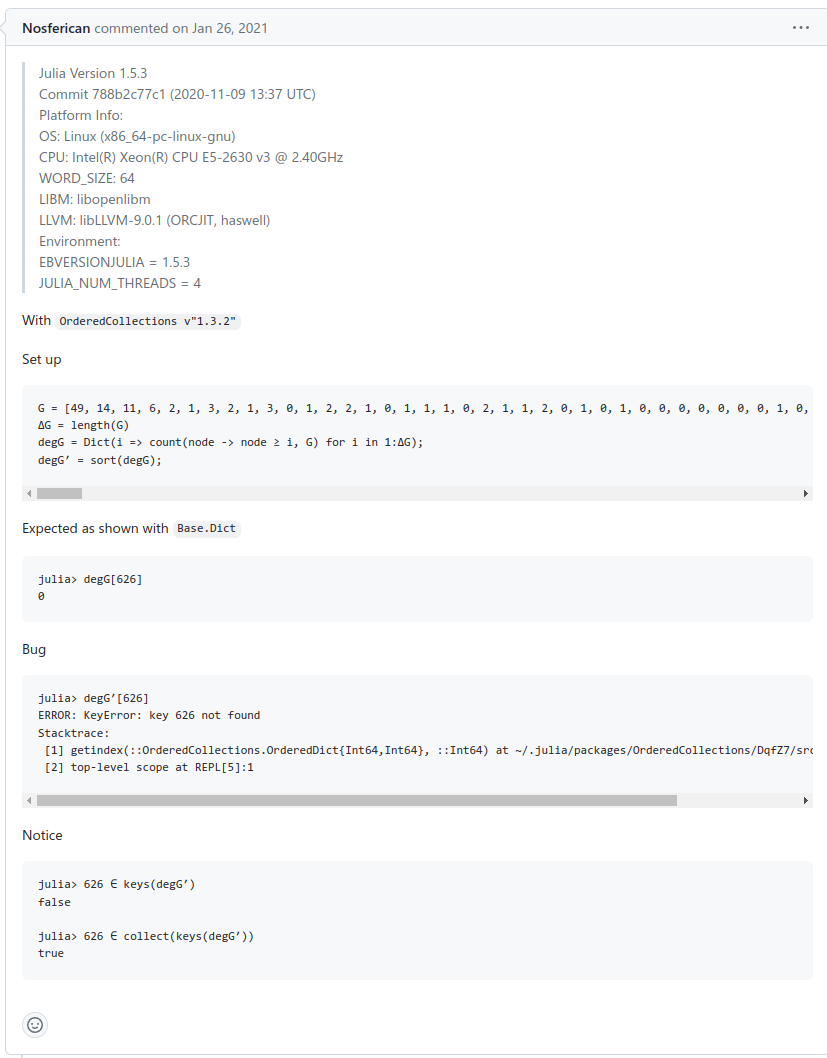

In [20]:
G = [49, 14, 11, 6, 2, 1, 3, 2, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
ΔG = length(G)
degG = Dict(i => count(node -> node ≥ i, G) for i in 1:ΔG);
degG′ = sort(degG);

In [21]:
degG[626]

0

In [22]:
degG′[626]

0

In [24]:
print(626 ∈ keys(degG′))
display(626 ∈ collect(keys(degG′)))

true

true